 
    
<h1 align=center><font size = 5>AI SATURDAY LAGOS COHORT 4</font></h1>   

   
<h2 align=center><font size = 6>THE NIGERIAN DEMOGRAPHY</font></h2><br>
  
  

<h3 align=center><font size = 4>BY SHARON IBEJIH</font></h3>


<h5 align=center><font size = 3>December, 2019.</font></h5>
   
    
    
    
  

### _Abstract_

_Nigeria, one of the most prominent nations in Africa, is well known by her high population density. It is also known to have a GDP estimate of USD 375 billion as at 2012 according to IMF (International Monetary Fund), making the country rank 30th largest economy in the world. This article focused on the big question that asked if there is a healthy relationship between the huge GDP and quality life of the citizens. Initially a survey was carried out to obtain data on relevant features in determining the standard of living in the country. The project analysis gave a broad view on how poorly most Nigerians earn and perharps live._

## 1. Introduction<a id="0"></a>

According to the National Population Commission, Nigeria had a population of 193 million as at 2016, with an annual growing rate of 3.2%. The dependency ratio in the country was about 88.2% per 100 non-dependents (less than 15 years, older than 60 years) and 41% of the nation's population were below 15 years of age. According to the UN World Population Prospects (2017), the country's population could reach 410 million by 2050. With this yearning growth rate, and likely youth bulge in the nearest future, there is a huge concern on the economic state of the nation. Will the country be capable of taking care of their uprising citizens? What challenges are those currently in their prime (25-59 years) facing and how can they be handled? How can the dependent older population get sustained and benefitted through their life span? These concerns suggest some gaps in the delivery of socio-economic benefit to the age structures of the population.

Due to such recent observations by some research works and bodies, projects that attempts to determine and measure the inequality that stands between the high GDP rate of a country and the state of decline in the quality of living of its citizens are being encouraged. This is to properly understand the scope of the problems that exist and suggest strategies which can result to solutions in the country.

## 2. Problem Statement<a id="2"></a>

Nigeria, a country with a population 186 million people, is often referred to as the "Giant of Africa".  
Nigeria owns this title because the following: 
1. It is/was the most populous country in Africa. 
2. It is/was home to the sixth largest urban center in the world. 
3. It is/was the country the biggest economy in Africa


Today, this is not the case, citizens and foreigners doubt and challenge this title with some facts. Some say poverty is high, some say leadership is bad, some say the citizens are barbarians. 
As data scientists, we attempt to understand the life of Nigerians and also question the Nigerian economy and lifestyle to proffer solution based on data.

## 3. Materials and Methods<a id="4"></a>

The dataset used in this work was complied as NIGERIA_DEMOGRAPHICS_DATA.csv, from a survey conducted about a month back from the date of this analysis. It focused on the age bracket of the respondents, their occupation, location, salary range and a few other related information. These data samples will be used to check through the lives of most Nigerians and how standard their living is on an average. 

The analytical process of this work started with cleaning the data derived. Cleaning is simply making the data good enough for use. This was done by filling the empty cells with either the most frequent input or average input of that affected column. The column headers were also renamed to look brief and flexible. Aside the cleaning, some calculations were required as well to produce more features to yield a proper analysis. From tablular representations to visualizations of the data we had at hand, we were able to arrive at some datailed point which gave a clear understanding on the lifestyle of most Nigerians and the challenges many are facing.

Please note that the currency represented in this project is Naira; so every monetary value here should be ascribed to that.

## 4. Data Analysis<a id="6"></a>



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk import word_tokenize
import time

In [2]:
!pip install wordcloud

In [3]:
from wordcloud import WordCloud

In [4]:
Data = pd.read_csv('NIGERIA_DEMOGRAPHICS_DATA.csv')

In [5]:
Data.columns.values

array(['Timestamp', 'Are you a Nigerian?', 'Gender', 'Age Group',
       'Are you married?', 'Do you have kids?', 'Where do you live?',
       'What part of your state do you live in?', 'Occupation',
       'Are you Happy with your job?',
       'Is this your primary source of income?',
       'What is your steady/constant income range in a month?',
       'Do you think it is enough for you and your family?',
       'What are your other sources of income? ', 'Do you pay your tax?',
       'What is your largest form of expense',
       'If there was one thing you really wanted to own, what would that be?',
       'How much do you think you earn from all other sources of income in a month',
       'On an average, how much do you think you spend in a month?',
       'Do you think Nigeria can get better?',
       'In a short sentence, describe your government',
       'Please fill your email if you want to be notified once this research is completed.'],
      dtype=object)

Since the column headers look very long and clumsy, we would have to rename them into something shorter and understandable.

In [6]:
Data.rename(columns = {'Are you a Nigerian?': 'Nigerian Citizen',
                       'Are you married?': 'Married',
                    'Do you have kids?': 'Parenting' , 
                    'Where do you live?': 'State of Residence', 
                    'What part of your state do you live in?': 'Area of Residence', 
                    'Are you Happy with your job?': 'Job Satisfaction', 
                    'Is this your primary source of income?': 'Job as primary income',
                   'What is your steady/constant income range in a month?': 'Monthly Primary Income',
                   'Do you think it is enough for you and your family?': 'Income sufficiency',
                   'What are your other sources of income? ': 'Secondary income',
                   'Do you pay your tax?': 'Tax Payment',
                   'What is your largest form of expense': 'Major Monthly Expense',
                   'If there was one thing you really wanted to own, what would that be?': 'Aspiring Possession',
                   'How much do you think you earn from all other sources of income in a month': 'Cumulative Secondary Income',
                   'On an average, how much do you think you spend in a month?': 'Monthly Expenditure',
                   'Do you think Nigeria can get better?': 'Is Nigeria Hopeful',
                   'In a short sentence, describe your government': 'Thought about the government',
                   'Please fill your email if you want to be notified once this research is completed.': 'E-mails'
                   }, inplace= True
           )

In [7]:
Data.shape

(303, 22)

From the dataset, we desire to drop some columns we might not be working with. These are the 'Timestamp' and 'E-mails' columns. This is because neither of them has impact on the project statement.

In [8]:
Data.drop(['Timestamp','E-mails'], axis = 1, inplace = True)

In [9]:
Data.isnull().sum()

Nigerian Citizen                15
Gender                           0
Age Group                        0
Married                          0
Parenting                        0
State of Residence               0
Area of Residence                0
Occupation                       1
Job Satisfaction                 0
Job as primary income            0
Monthly Primary Income           0
Income sufficiency               0
Secondary income                 1
Tax Payment                      0
Major Monthly Expense            0
Aspiring Possession              0
Cumulative Secondary Income      1
Monthly Expenditure              0
Is Nigeria Hopeful               0
Thought about the government     1
dtype: int64

From the above result, it is discovered that some column values are missing. There are various methods of fixing this. Since we do not have the luxury of datasets, we will be mindful of the method we opt for. 

<li>For the 'Nigerian Citizen', we will be replacing the missing values with the most frequent in the column.</li>
<li>The 'Occupation', 'Secondary income' and 'Cumulative Secondary Income' columns will be filled with 'No Job', 'None' and 0 respectively.</li>
This is because they all have just one missing value and we will choose to almost reflect them with a null input. 

In [10]:
Data.describe(include='all')

,Nigerian Citizen,Gender,Age Group,Married,Parenting,State of Residence,Area of Residence,Occupation,Job Satisfaction,Job as primary income,Monthly Primary Income,Income sufficiency,Secondary income,Tax Payment,Major Monthly Expense,Aspiring Possession,Cumulative Secondary Income,Monthly Expenditure,Is Nigeria Hopeful,Thought about the government
count,288,303,303,303,303,303,303,302,303,303,303,303,302,303,303,303,3.020000e+02,3.030000e+02,303,302
unique,2,3,5,2,2,20,4,13,2,2,10,2,17,2,9,6,NaN,NaN,2,268
top,Yes,Male,18 – 25,No,No,Lagos,Urban,Software Engineering /Computer Design,Yes,Yes,"21,000 – 50,000",No,None,Yes,Feeding,A Company,NaN,NaN,Yes,Corrupt
freq,285,216,181,269,279,229,167,50,176,238,82,283,102,176,102,130,NaN,NaN,224,7
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.627668e+07,1.650782e+08,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.124313e+08,2.872421e+09,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.500000e+01,2.000000e+04,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.500000e+04,4.700000e+04,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+04,8.000000e+04,NaN,NaN


In [11]:
Data.loc[ :,('Nigerian Citizen')] =  Data['Nigerian Citizen'].fillna('Yes')

In [12]:
Data.loc[:,('Occupation')]= Data['Occupation'].fillna('No Job')

In [13]:
Data.loc[:,('Secondary income')] = Data['Secondary income'].fillna('None')

In [14]:
Data.loc[:,('Cumulative Secondary Income')]= Data['Cumulative Secondary Income'].fillna(0)

In [15]:
Data.loc[:,('Thought about the government')]= Data['Thought about the government'].fillna(method='pad')

In [16]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 20 columns):
Nigerian Citizen                303 non-null object
Gender                          303 non-null object
Age Group                       303 non-null object
Married                         303 non-null object
Parenting                       303 non-null object
State of Residence              303 non-null object
Area of Residence               303 non-null object
Occupation                      303 non-null object
Job Satisfaction                303 non-null object
Job as primary income           303 non-null object
Monthly Primary Income          303 non-null object
Income sufficiency              303 non-null object
Secondary income                303 non-null object
Tax Payment                     303 non-null object
Major Monthly Expense           303 non-null object
Aspiring Possession             303 non-null object
Cumulative Secondary Income     303 non-null float64
Monthly Ex

In [17]:
Data.head()

,Nigerian Citizen,Gender,Age Group,Married,Parenting,State of Residence,Area of Residence,Occupation,Job Satisfaction,Job as primary income,Monthly Primary Income,Income sufficiency,Secondary income,Tax Payment,Major Monthly Expense,Aspiring Possession,Cumulative Secondary Income,Monthly Expenditure,Is Nigeria Hopeful,Thought about the government
0,Yes,Female,18 – 25,No,No,Lagos,Rural,No Job,No,No,Below 5000,No,None,No,Feeding,A Company,0.0,25000,Yes,Frustrating
1,Yes,Female,18 – 25,No,No,Lagos,Rural,No Job,No,No,"11,000 – 20,000",No,Free Lancing,No,Transportation,A House,18000.0,20000,Yes,"Greedy, self centered and dull"
2,Yes,Male,36 – 45,Yes,Yes,Lagos,City,Financial Services,Yes,Yes,"110,000 – 200,000",No,Free Lancing,Yes,School Fees,A Company,40000.0,140000,Yes,Our government do not care about what the mass...
3,Yes,Female,26 – 35,No,No,Lagos,City,Business,Yes,Yes,"201,000 – 300,000",No,Buying and Selling,Yes,Transportation,Money,500000.0,100000,Yes,There is discrepancy in Nigeria's governance. ...
4,Yes,Male,26 – 35,No,No,Lagos,Rural,Engineering,Yes,Yes,"110,000 – 200,000",Yes,Formal Job,Yes,Transportation,A Company,0.0,60000,Yes,It is a corrupt one lead by inconsiderate fell...


Let's proceed into inquiring the earnings of most Nigerians in a month.

In [18]:
df = Data.groupby('Monthly Primary Income').mean()
df

,Cumulative Secondary Income,Monthly Expenditure
Monthly Primary Income,,
"11,000 – 20,000",2.017276e+04,2.327638e+04
"110,000 – 200,000",4.812568e+04,9.135514e+04
"201,000 – 300,000",1.223913e+05,1.291305e+05
"21,000 – 50,000",1.219827e+08,3.299451e+04
"301,000 – 500,000",1.333333e+05,1.466833e+05
"500,000 – above",1.250315e+09,6.250262e+09
"5000 – 10,000",1.702778e+04,1.872333e+04
"51,000 – 80,000",6.474455e+04,5.682303e+04
"81,000 – 100,000",3.485946e+04,7.500374e+04


<li> Table 1

It is not a new thing that the higher the income, the more probability for a higher expenditure. The table above simply explains that one's standard of living is directly proportional to the income.

In [19]:
Data.groupby(['Monthly Primary Income']).groups.keys()

dict_keys(['11,000 – 20,000', '110,000 – 200,000', '201,000 – 300,000', '21,000 – 50,000', '301,000 – 500,000', '500,000 – above', '5000 – 10,000', '51,000 – 80,000', '81,000 – 100,000', 'Below 5000'])

We will calculate the mean of the ranges in the **'Monthly Primary Income'**. With the mean, we can easily sum it to their respective **'Cumulative Secondary income'** so as to know the **'Total Monthly Income'** for each data sample. 

In [20]:
#Replacing the column with their individual corresponding mean values

Data['Monthly Primary Income']= Data['Monthly Primary Income'].replace('Below 5000', 2500)
Data['Monthly Primary Income']= Data['Monthly Primary Income'].replace('11,000 – 20,000', 15500)
Data['Monthly Primary Income']= Data['Monthly Primary Income'].replace('110,000 – 200,000', 155000)
Data['Monthly Primary Income']= Data['Monthly Primary Income'].replace('201,000 – 300,000', 250500)
Data['Monthly Primary Income']= Data['Monthly Primary Income'].replace('21,000 – 50,000', 35500)
Data['Monthly Primary Income']= Data['Monthly Primary Income'].replace('301,000 – 500,000',400500)
Data['Monthly Primary Income']= Data['Monthly Primary Income'].replace('500,000 – above', 750000)
Data['Monthly Primary Income']= Data['Monthly Primary Income'].replace('5000 – 10,000', 7500)
Data['Monthly Primary Income']= Data['Monthly Primary Income'].replace('51,000 – 80,000',65500)
Data['Monthly Primary Income']= Data['Monthly Primary Income'].replace('81,000 – 100,000',90500)
                                                                   
                                                                  

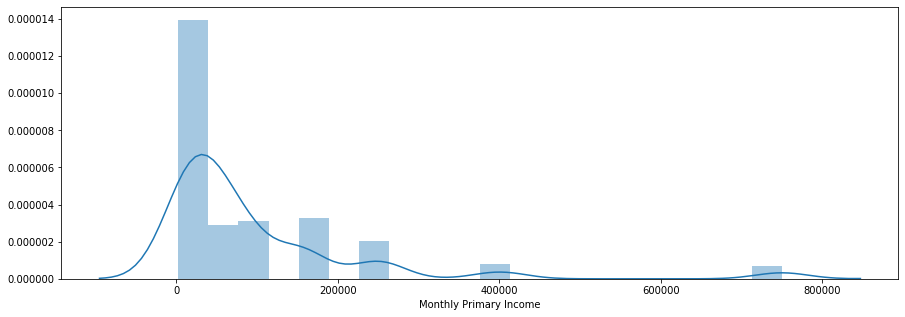

In [21]:
import seaborn as sns
plt.figure(figsize = (15, 5))
sns.distplot(Data['Monthly Primary Income'])

**Fig. 1** shows that majority of people have their income range between 0 - 200000 per month.

In [22]:
#Creating a new column: Total Monthly Income

Data['Total Monthly Income']= Data['Monthly Primary Income'] + Data['Cumulative Secondary Income']

In [23]:
#Creating a new column: Net Income

Data['Net Income']= Data['Total Monthly Income'] - Data['Monthly Expenditure']

In [24]:
# Lets see the number of people in each age group

Data['Age Group'].value_counts()

18 – 25    181
26 – 35    104
36 – 45     13
46 – 55      4
56 – 65      1
Name: Age Group, dtype: int64

We will be using categorical variables for columns with unique values. **No = 0**, **Yes = 1**. This is to aid a proper analysis.

In [25]:
Data['Married']= Data['Married'].replace('No', 0)
Data['Married']= Data['Married'].replace('Yes', 1)

In [26]:
Data['Parenting']= Data['Parenting'].replace('No', 0)
Data['Parenting']= Data['Parenting'].replace('Yes', 1)

In [27]:
Data['Job Satisfaction']= Data['Job Satisfaction'].replace('No', 0)
Data['Job Satisfaction']= Data['Job Satisfaction'].replace('Yes', 1)

In [28]:
Data['Job as primary income']= Data['Job as primary income'].replace('No', 0)
Data['Job as primary income']= Data['Job as primary income'].replace('Yes', 1)

In [29]:
Data['Income sufficiency']= Data['Income sufficiency'].replace('No', 0)
Data['Income sufficiency']= Data['Income sufficiency'].replace('Yes', 1)

In [30]:
Data['Tax Payment']= Data['Tax Payment'].replace('No', 0)
Data['Tax Payment']= Data['Tax Payment'].replace('Yes', 1)

In [31]:
Data['Is Nigeria Hopeful']= Data['Is Nigeria Hopeful'].replace('No', 0)
Data['Is Nigeria Hopeful']= Data['Is Nigeria Hopeful'].replace('Yes', 1)

In [32]:
cols= list(Data.columns.values)
data = Data[cols[0:3] + cols[5:8] + [cols[12]] + cols[14:16] + [cols[19]] + cols[3:5] + cols[8:12] \
            + [cols[13]]+ cols[16:19]+ cols[20:22]]

In [33]:
data.head()

,Nigerian Citizen,Gender,Age Group,State of Residence,Area of Residence,Occupation,Secondary income,Major Monthly Expense,Aspiring Possession,Thought about the government,...,Job Satisfaction,Job as primary income,Monthly Primary Income,Income sufficiency,Tax Payment,Cumulative Secondary Income,Monthly Expenditure,Is Nigeria Hopeful,Total Monthly Income,Net Income
0,Yes,Female,18 – 25,Lagos,Rural,No Job,None,Feeding,A Company,Frustrating,...,0,0,2500,0,0,0.0,25000,1,2500.0,-22500.0
1,Yes,Female,18 – 25,Lagos,Rural,No Job,Free Lancing,Transportation,A House,"Greedy, self centered and dull",...,0,0,15500,0,0,18000.0,20000,1,33500.0,13500.0
2,Yes,Male,36 – 45,Lagos,City,Financial Services,Free Lancing,School Fees,A Company,Our government do not care about what the mass...,...,1,1,155000,0,1,40000.0,140000,1,195000.0,55000.0
3,Yes,Female,26 – 35,Lagos,City,Business,Buying and Selling,Transportation,Money,There is discrepancy in Nigeria's governance. ...,...,1,1,250500,0,1,500000.0,100000,1,750500.0,650500.0
4,Yes,Male,26 – 35,Lagos,Rural,Engineering,Formal Job,Transportation,A Company,It is a corrupt one lead by inconsiderate fell...,...,1,1,155000,1,1,0.0,60000,1,155000.0,95000.0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 22 columns):
Nigerian Citizen                303 non-null object
Gender                          303 non-null object
Age Group                       303 non-null object
State of Residence              303 non-null object
Area of Residence               303 non-null object
Occupation                      303 non-null object
Secondary income                303 non-null object
Major Monthly Expense           303 non-null object
Aspiring Possession             303 non-null object
Thought about the government    303 non-null object
Married                         303 non-null int64
Parenting                       303 non-null int64
Job Satisfaction                303 non-null int64
Job as primary income           303 non-null int64
Monthly Primary Income          303 non-null int64
Income sufficiency              303 non-null int64
Tax Payment                     303 non-null int64
Cumulative Seconda

>## Exploring the non-numeric features

In [35]:
print('Nigerian:', data['Nigerian Citizen'].unique(), '\n')
print('Gender:', data['Gender'].unique(), '\n')
print('Age group:', data['Age Group'].unique(), '\n')
print('State of residence:', data['State of Residence'].unique(), '\n')
print('Area:', data['Area of Residence'].unique(), '\n')
print('Occupation:', data['Occupation'].unique(), '\n')
print('Secondary source of income:', data['Secondary income'].unique(), '\n')
print('Major Consumption:', data['Major Monthly Expense'].unique(), '\n')
print('Aspiring Possession:', data['Aspiring Possession'].unique())

Nigerian: ['Yes' 'No'] 

Gender: ['Female' 'Male' 'Prefer not to say'] 

Age group: ['18 – 25' '36 – 45' '26 – 35' '56 – 65' '46 – 55'] 

State of residence: ['Lagos' 'Oyo' 'Ogun' 'Abuja (FCT)' 'Anambra' 'Kaduna' 'Cross River'
 'Rivers' 'Imo' 'Nasarawa' 'Niger' 'Delta' 'Kwara' 'Benue' 'Edo' 'Osun'
 'Akwa Ibom' 'Abia' 'Plateau' 'Ondo'] 

Area: ['Rural' 'City' 'Urban' 'I don’t know'] 

Occupation: ['No Job' 'Financial Services' 'Business' 'Engineering' 'Consultant'
 'Software Engineering /Computer Design' 'Student' 'Entrepreneur'
 'I don’t know' 'Health' 'Student and Working' 'Farmer' 'Others'] 

Secondary source of income: ['None' 'Free Lancing' 'Buying and Selling' 'Formal Job'
 'Buying and Selling, Contractor' 'Contractor'
 'Free Lancing, Buying and Selling' 'Betting (Bet Naija)'
 'Betting (Bet Naija), Buying and Selling'
 'Free Lancing, Betting (Bet Naija)' 'Free Lancing, Contractor'
 'Free Lancing, Formal Job' 'Free Lancing, Formal Job, Buying and Selling'
 'Free Lancing, Buying and

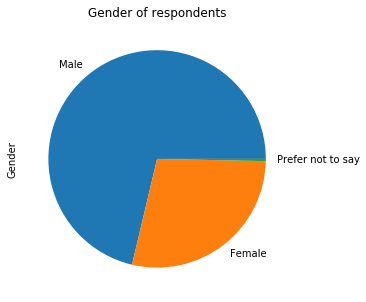

percentage of females: 28.382838283828384 %
percentage of males: 71.2871287128713 %


In [40]:
# Gender types percentage
data['Gender'].value_counts().plot(kind = 'pie')
plt.title ('Gender of respondents')
plt.show()

print('percentage of females:', sum(map(lambda x:x == 'Female', data['Gender'])) * 100/len(data['Gender']),'%')
print('percentage of males:', sum(map(lambda x:x == 'Male', data['Gender'])) * 100/len(data['Gender']),'%')

**Fig. 2**

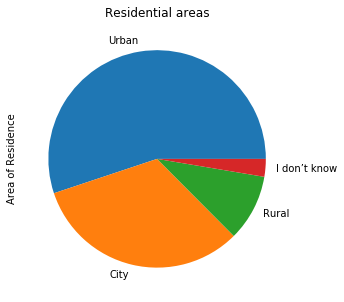

percentage of Rural residents: 9.900990099009901 %
percentage of City residents: 32.34323432343234 %
percentage of Urban residents: 55.115511551155116 %


In [37]:
# Areas of Residence percentage
data['Area of Residence'].value_counts().plot(kind = 'pie')
plt.title ('Residential areas')
plt.show()

print('percentage of Rural residents:', sum(map(lambda x:x == 'Rural', data['Area of Residence'])) \
      * 100/len(data['Area of Residence']),'%')

print('percentage of City residents:', sum(map(lambda x:x == 'City', data['Area of Residence'])) \
      * 100/len(data['Area of Residence']),'%')

print('percentage of Urban residents:', sum(map(lambda x:x == 'Urban', data['Area of Residence'])) \
      * 100/len(data['Area of Residence']),'%')


**Fig. 3**

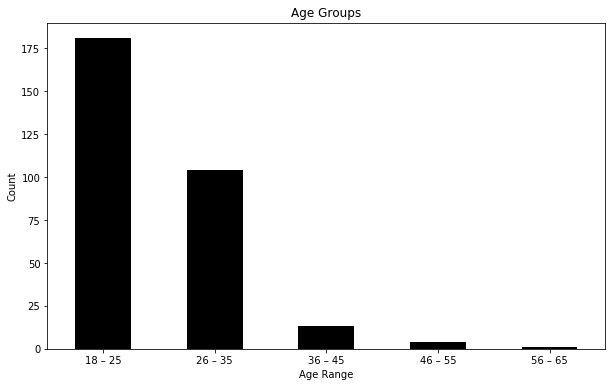

18 – 25: 59.73597359735974 %
26 – 35: 34.32343234323432 %
36 – 45: 4.29042904290429 %
46 – 55: 1.3201320132013201 %
56 – 65: 0.33003300330033003 %


In [40]:
data['Age Group'].value_counts().plot(kind='bar', figsize=(10,6), rot=0, color = 'k') 
plt.xlabel("Age Range")
plt.ylabel("Count" )
plt.title("Age Groups" )
plt.xticks(ticks=(np.arange(0,5)), labels=('18 – 25', '26 – 35', '36 – 45', '46 – 55', '56 – 65'))
plt.show()

print('18 – 25:', sum(map(lambda x:x == '18 – 25', data['Age Group'])) * 100/len(data['Age Group']),'%')
print('26 – 35:', sum(map(lambda x:x == '26 – 35', data['Age Group'])) * 100/len(data['Age Group']),'%')
print('36 – 45:', sum(map(lambda x:x == '36 – 45', data['Age Group'])) * 100/len(data['Age Group']),'%')
print('46 – 55:', sum(map(lambda x:x == '46 – 55', data['Age Group'])) * 100/len(data['Age Group']),'%')
print('56 – 65:', sum(map(lambda x:x == '56 – 65', data['Age Group'])) * 100/len(data['Age Group']),'%')


**Fig. 4**

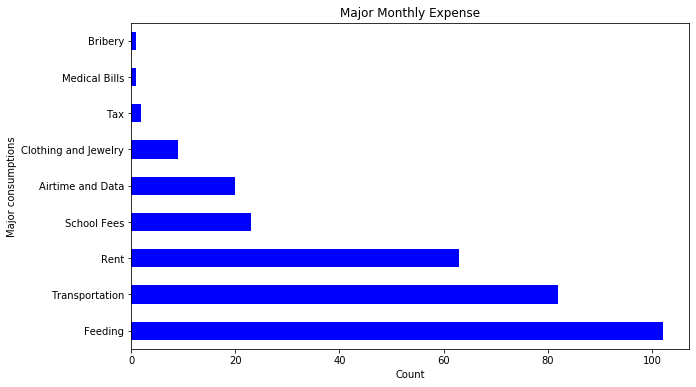

In [41]:
data['Major Monthly Expense'].value_counts().plot(kind='barh', figsize=(10,6), rot=0, color = 'b') 
plt.xlabel("Count")
plt.ylabel("Major consumptions" )
plt.title("Major Monthly Expense" )
plt.show()

**Fig. 5**

We can see that majority of the masses spend their monthly income on feeding. Taking a quick review on the cost of some major foods in Nigeria between 2016 to 2019. The dataset was sourced from the National Bureau of Statistics, Nigeria (http://nigeria.opendataforafrica.org/gjskat/selected-food-prices-watch-march-2019).

In [88]:
Food_prices = pd.read_excel('FoodObservationData.xlsx')
Food_prices

,State,State Name,Item Name,Scale,Units,2016 March,2017 March,2018 March,2019 March
0,NG,Nigeria,Rice local sold loose,units,1kg,200.429963,308.867810,283.567685,280.797321
1,NG,Nigeria,Onion bulb,units,1kg,190.804431,246.948910,235.306506,231.905619
2,NG,Nigeria,"Gari yellow,sold loose",units,1kg,166.396493,302.047239,243.992510,184.182166
3,NG,Nigeria,"Evaporated tinned milk(peak), 170g",units,1 unit,139.164720,177.054054,187.610212,188.229615
4,NG,Nigeria,Bread sliced 500g,units,1 loaf,259.291413,297.505882,305.878268,299.977923
5,NG,Nigeria,"Beans brown,sold loose",units,1kg,240.914433,353.277237,395.343034,368.073977
6,NG,Nigeria,Vegetable oil:1 bottle,units,1Ltr,348.840000,513.420000,533.453244,506.646564
7,NG,Nigeria,Palm oil: 1 bottle,units,1Ltr,327.840000,442.040000,492.132941,460.324406
8,NG,Nigeria,Titus:frozen,units,1kg,712.193643,774.893522,905.757578,945.656213
9,NG,Nigeria,Yam tuber,units,1kg,156.585849,255.864752,254.509000,200.882499


<li> Table 2

The dataset above shows clearly the current prices of some common foodstuff. In as much as these current prices seem cheaper then its last two years, it still cannot be compared to how much they were as at 2016. This shows that there has a been a huge inflation on foodstuff over the years. 

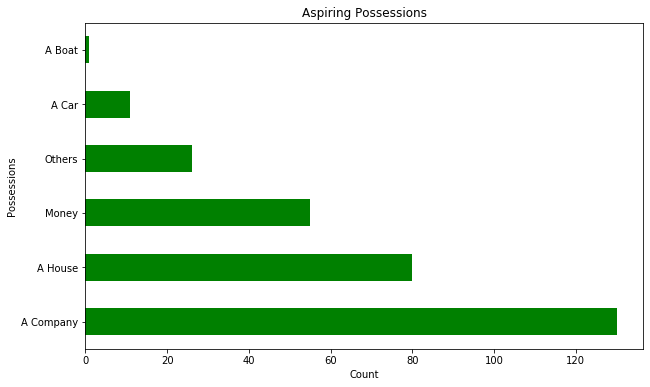

In [42]:
data['Aspiring Possession'].value_counts().plot(kind='barh', figsize=(10,6), rot=0, color = 'g') 
plt.xlabel("Count")
plt.ylabel("Possessions" )
plt.title("Aspiring Possessions" )

plt.show()

**Fig. 6**

__`Sentiment Analysis`__

In [43]:
# for k in data.keys():
#     data[k] = data[k].lower()
data['Thought about the government'] = data['Thought about the government'].str.lower()
print(data['Thought about the government'][: 10])

0                                          frustrating
1                       greedy, self centered and dull
2    our government do not care about what the mass...
3    there is discrepancy in nigeria's governance. ...
4    it is a corrupt one lead by inconsiderate fell...
5       absolutely clueless on developmental programs.
6                                        not competent
7                                                ionno
8                                           no comment
9                                       no government 
Name: Thought about the government, dtype: object


In [115]:
d = data['Thought about the government'].to_dict()
for k in d.keys():
    d[k] = re.sub(r'[-./?!,":;()\']',' ',d[k]) 

    #print(data['Thought about the government'][ : 10],)

In [116]:
for k in d.keys():
    d[k] = re.sub('[-|0-9]',' ',d[k])
    
    #print(data['Thought about the government'])

In [122]:
# import nltk
# nltk.download()

In [123]:
# from nltk.corpus import stopwords
# from wordcloud import WordCloud, STOPWORDS
# for k in d.keys():
#     d[k] = d[k].split()

#     stopwords_list = stopwords.words('english')
    
#     for k in d.keys():
#         d[k] = [ w for w in d[k] if not w in stopwords_list ]
    
            
#         #print(data['Thought about the government'])

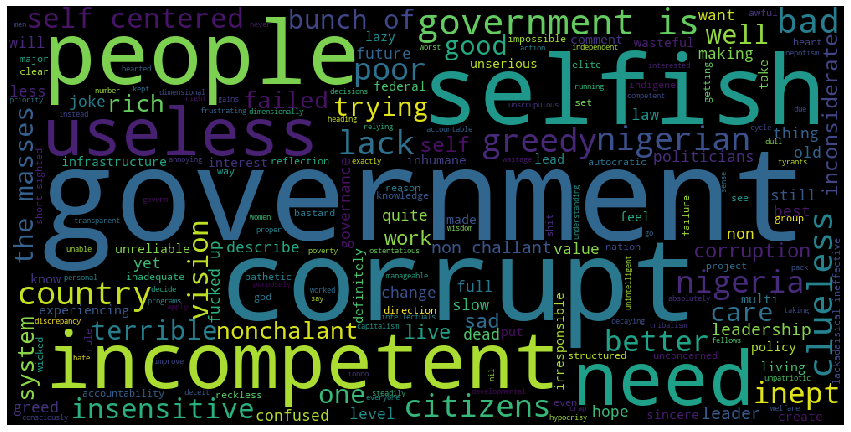

In [48]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(data['Thought about the government']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [49]:

from PIL import Image
#d = C:\Users\Sharon\Downloads
img = np.array(Image.open('C:\\Users\\Sharon\\Nig. map.png'))
img.shape

(225, 225)

In [50]:
def transform_format(val):
    if val == 1:
        return 255
    else:
        return val

In [51]:
img_mask = np.ndarray((img.shape[0], img.shape[1]), np.int32)
for i in range(len(img)):
    img_mask[i] = list(map(transform_format, img[i]))

In [52]:
img_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

In [53]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
#stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=img_mask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')

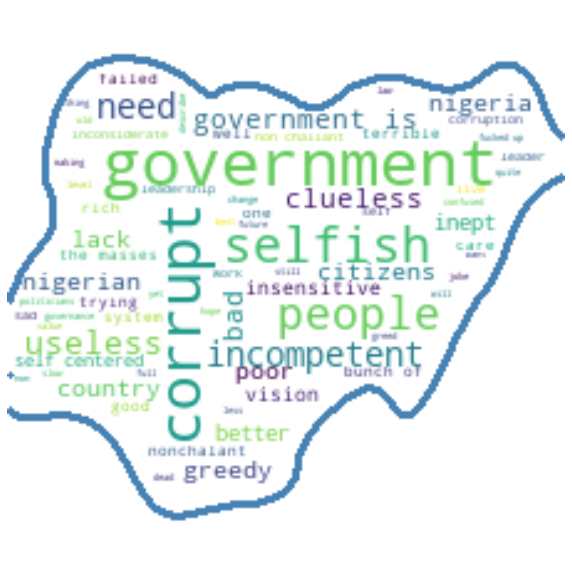

In [54]:
wc.generate(' '.join(data['Thought about the government']))

# store to file
wc.to_file("C:\\Users\\Sharon\\Nig. Sentmt_Analysis.png")

# show
# plt.imshow(wc, interpolation='bilinear')
# plt.axis("off")
plt.figure(figsize = [10, 20])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

**Fig. 7** showing a Word Cloud of our respondents remarks about the government. The chart however, shows that a lot of people gave negative sentiments about the Nigerian government.

In [ ]:
Nig_analysis = pd.DataFrame(data['Thought about the government'])
Nig_analysis.to_excel('Nig_analysis.xlsx')

In [ ]:
Nig_Demo_data = data
Nig_Demo_data.to_excel('Nig_Demo_data.xlsx')

>## Exploring the numering features

In [57]:
data.describe()

,Married,Parenting,Job Satisfaction,Job as primary income,Monthly Primary Income,Income sufficiency,Tax Payment,Cumulative Secondary Income,Monthly Expenditure,Is Nigeria Hopeful,Total Monthly Income,Net Income
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,3.030000e+02,3.030000e+02,303.000000,3.030000e+02,3.030000e+02
mean,0.112211,0.079208,0.580858,0.785479,99003.300330,0.066007,0.580858,6.605795e+07,1.650782e+08,0.739274,6.615695e+07,-9.892126e+07
std,0.316148,0.270510,0.494235,0.411169,139127.133445,0.248704,0.494235,8.110941e+08,2.872421e+09,0.439757,8.111181e+08,2.370469e+09
min,0.000000,0.000000,0.000000,0.000000,2500.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,2.500000e+03,-3.999925e+10
25%,0.000000,0.000000,0.000000,1.000000,25500.000000,0.000000,0.000000,5.000000e+01,2.000000e+04,0.000000,3.550000e+04,5.500000e+03
50%,0.000000,0.000000,1.000000,1.000000,35500.000000,0.000000,1.000000,1.500000e+04,4.700000e+04,1.000000,8.550000e+04,3.050000e+04
75%,0.000000,0.000000,1.000000,1.000000,155000.000000,0.000000,1.000000,5.000000e+04,8.000000e+04,1.000000,1.655000e+05,1.005000e+05
max,1.000000,1.000000,1.000000,1.000000,750000.000000,1.000000,1.000000,1.000000e+10,5.000000e+10,1.000000,1.000075e+10,9.999996e+09


If you study the table above, you'd realize that there is a huge difference between the 50% percentile(Median) and the mean values for some columns. This is trying to tell us that there are some high valued outliers which are affecting the value of the mean, causing it to be far higher than the median.

To solve this we will have to define a range for these columns, so have to remove outliers. Hence we will be using a standard deviation of 3. The columns are:
    - Monthly Primary Income
    - Cumulative Secondary Income
    - Monthly Expenditure
    - Total Monthly Income
    - Net Income.

In [56]:
data_new = data[['Monthly Primary Income', 'Cumulative Secondary Income', 'Monthly Expenditure', 'Total Monthly Income',
                'Net Income']]

In [58]:
#data_new = data[np.abs(data - data.mean()) <= (3* data.std())]
data_new = data_new[~(np.abs(data_new - data_new.mean()) > (2 * data_new.std()))]

In [59]:
data_new.describe()

,Monthly Primary Income,Cumulative Secondary Income,Monthly Expenditure,Total Monthly Income,Net Income
count,286.000000,301.000000,302.000000,3.010000e+02,3.010000e+02
mean,71305.944056,51686.249169,61911.238411,1.487377e+05,8.675371e+04
std,70530.358771,103407.069704,66832.603034,2.083055e+05,1.679210e+05
min,2500.000000,0.000000,0.000000,2.500000e+03,-9.750000e+04
25%,15500.000000,50.000000,20000.000000,3.550000e+04,5.500000e+03
50%,35500.000000,15000.000000,46000.000000,8.550000e+04,3.050000e+04
75%,90500.000000,50000.000000,80000.000000,1.655000e+05,1.005000e+05
max,250500.000000,700000.000000,450000.000000,1.450000e+06,1.250000e+06


After trying the 3 std method, the mean and median were still wide apart so I decided to go with ~ 2 std. I'll go with it this way, because there is a tendency that the values are clustered, having some withing a range of low values and others a range of high. 

In [60]:
data_new.shape

(303, 5)

In [61]:
data_new.isnull().sum()

Monthly Primary Income         17
Cumulative Secondary Income     2
Monthly Expenditure             1
Total Monthly Income            2
Net Income                      2
dtype: int64

In [62]:
data_new['Monthly Primary Income'] = data_new['Monthly Primary Income'].fillna(35500)
data_new['Cumulative Secondary Income'] = data_new['Cumulative Secondary Income'].fillna(10000)
data_new['Monthly Expenditure'] = data_new['Monthly Expenditure'].fillna(40000)
data_new['Total Monthly Income'] = data_new['Total Monthly Income'].fillna(68250)
data_new['Net Income'] = data_new['Net Income'].fillna(25500)

In [63]:
data_new.describe()

,Monthly Primary Income,Cumulative Secondary Income,Monthly Expenditure,Total Monthly Income,Net Income
count,303.000000,303.000000,303.000000,3.030000e+02,3.030000e+02
mean,69297.029703,51411.092409,61838.924092,1.482065e+05,8.634940e+04
std,69011.798764,103119.540444,66733.734114,2.077172e+05,1.674378e+05
min,2500.000000,0.000000,0.000000,2.500000e+03,-9.750000e+04
25%,25500.000000,50.000000,20000.000000,3.550000e+04,5.500000e+03
50%,35500.000000,15000.000000,45000.000000,8.550000e+04,3.050000e+04
75%,90500.000000,50000.000000,80000.000000,1.655000e+05,1.005000e+05
max,250500.000000,700000.000000,450000.000000,1.450000e+06,1.250000e+06


(0, 489159.26656556665)

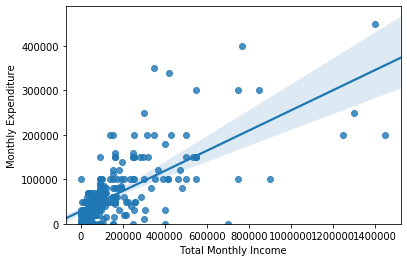

In [64]:
sns.regplot(x= 'Total Monthly Income', y= 'Monthly Expenditure', data=data_new)
plt.ylim(0,)

**Fig. 8** shows that there is a strong positive correlation between the Total Monthly Income and the Monthly Expenditure.

(0, 472829.1135954583)

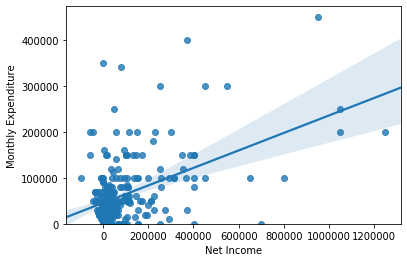

In [65]:
sns.regplot(x= 'Net Income', y= 'Monthly Expenditure', data=data_new)
plt.ylim(0,)

In **Fig. 9**, the correlation is tilting towards being parallel. This shows that there is relatively little to no correlation between the two.  

(0, 1317519.1539310266)

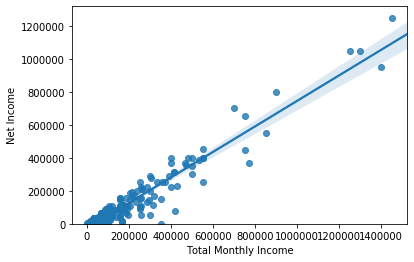

In [66]:
sns.regplot(x= 'Total Monthly Income', y= 'Net Income', data=data_new)
plt.ylim(0,)

**Fig. 10** shows a very strong linear relationship between the Total Montly Income and Net Income.

This tells that both the expenses we make and our monthly net income strongly depend on our monthly income.

So then let's proceed to classfying the Total Monthly Income and the Net Income to illustrate the classes of the sample population.

In [68]:
# Creating Income ranges for the Net Income.
data_new['Total Income class'] = ['Very Low' if 2.500000e+03 < total_income < 50000
                        else 'Low' if 50000 < total_income < 100000
                      else 'Medium' if 100000 < total_income < 150000
                      else 'High' if 150000 < total_income < 300000
                      else 'Very High' if 300000 < total_income < 1000000
                      else 'Outlier' \
                      for total_income in list(data_new['Total Monthly Income'].values)
                           ]

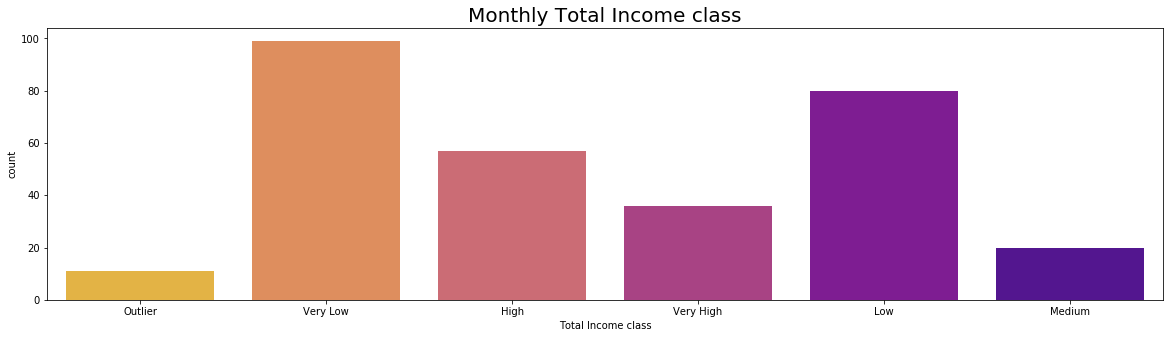

In [69]:
plt.rcParams['figure.figsize']=(20,5)
sns.countplot(data_new['Total Income class'], palette = 'plasma_r')
plt.title('Monthly Total Income class', fontsize = 20)
plt.show()

**Fig. 11** As 'Very Low' and 'Low' have the highest bars, it implies that more people have a total income within the range of N2,500 - N100,000 per month. Also it showed the 'High' group which earns between N150,000 - above N300,000. 

In [70]:
data_new['Total Income class'].value_counts()

Very Low     99
Low          80
High         57
Very High    36
Medium       20
Outlier      11
Name: Total Income class, dtype: int64

In [71]:
# Creating Income ranges for the Net Income.
data_new['Net Income class'] = ['Very Low' if -2.147484e+09 < net_income < 10000
                        else 'Low' if 10000 < net_income < 50000
                      else 'Medium' if 50000 < net_income < 150000
                      else 'High' if 150000 < net_income < 300000
                      else 'Very High' if 300000 < net_income < 1000000
                      else 'Outlier' \
                      for net_income in list(data_new['Net Income'].values)
                           ]

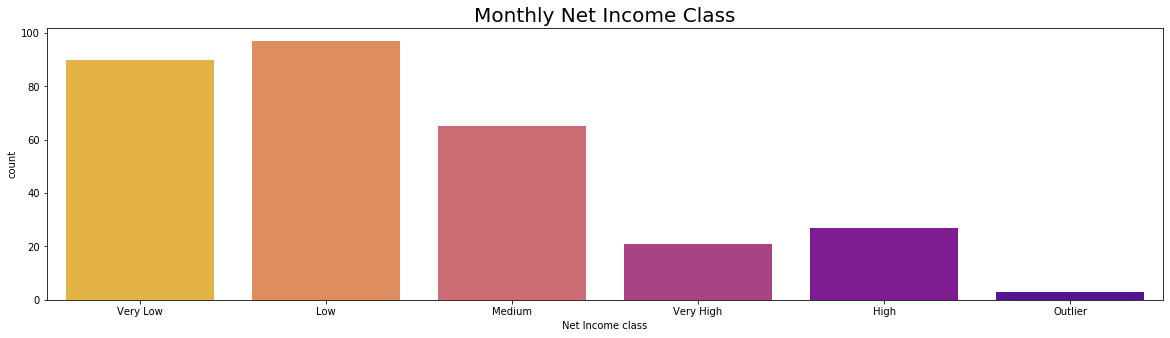

In [72]:
plt.rcParams['figure.figsize']=(20,5)
sns.countplot(data_new['Net Income class'], palette = 'plasma_r')
plt.title('Monthly Net Income Class', fontsize = 20)
plt.show()

**Fig. 12** places more popularity on the Very Low to Medium classes. These lie between negative values(debts) to N150,000 monthly net worth.

In [73]:
data_new['Net Income class'].value_counts()

Low          97
Very Low     90
Medium       65
High         27
Very High    21
Outlier       3
Name: Net Income class, dtype: int64

Let's observe graphically how the age groups are related to the net incomes.

In [78]:
data['Age Group'] = data['Age Group'].replace ('18 – 25', 1)
data['Age Group'] = data['Age Group'].replace ('26 – 35', 2)
data['Age Group'] = data['Age Group'].replace ('36 – 45', 3)
data['Age Group'] = data['Age Group'].replace ('46 – 55', 4)
data['Age Group'] = data['Age Group'].replace ('56 – 65', 5)


In [79]:
data['Age Group'] = data['Age Group'].astype(int)

In [80]:
data = data
data = data.drop(['Monthly Primary Income', 'Cumulative Secondary Income', 'Monthly Expenditure', 'Total Monthly Income',
                'Net Income'], axis = 1)
data = pd.concat([data, data_new], axis = 1)
data.head()

,Nigerian Citizen,Gender,Age Group,State of Residence,Area of Residence,Occupation,Secondary income,Major Monthly Expense,Aspiring Possession,Thought about the government,...,Income sufficiency,Tax Payment,Is Nigeria Hopeful,Monthly Primary Income,Cumulative Secondary Income,Monthly Expenditure,Total Monthly Income,Net Income,Total Income class,Net Income class
0,Yes,Female,1,Lagos,Rural,No Job,None,Feeding,A Company,frustrating,...,0,0,1,2500.0,0.0,25000.0,2500.0,-22500.0,Outlier,Very Low
1,Yes,Female,1,Lagos,Rural,No Job,Free Lancing,Transportation,A House,"greedy, self centered and dull",...,0,0,1,15500.0,18000.0,20000.0,33500.0,13500.0,Very Low,Low
2,Yes,Male,3,Lagos,City,Financial Services,Free Lancing,School Fees,A Company,our government do not care about what the mass...,...,0,1,1,155000.0,40000.0,140000.0,195000.0,55000.0,High,Medium
3,Yes,Female,2,Lagos,City,Business,Buying and Selling,Transportation,Money,there is discrepancy in nigeria's governance. ...,...,0,1,1,250500.0,500000.0,100000.0,750500.0,650500.0,Very High,Very High
4,Yes,Male,2,Lagos,Rural,Engineering,Formal Job,Transportation,A Company,it is a corrupt one lead by inconsiderate fell...,...,1,1,1,155000.0,0.0,60000.0,155000.0,95000.0,High,Medium


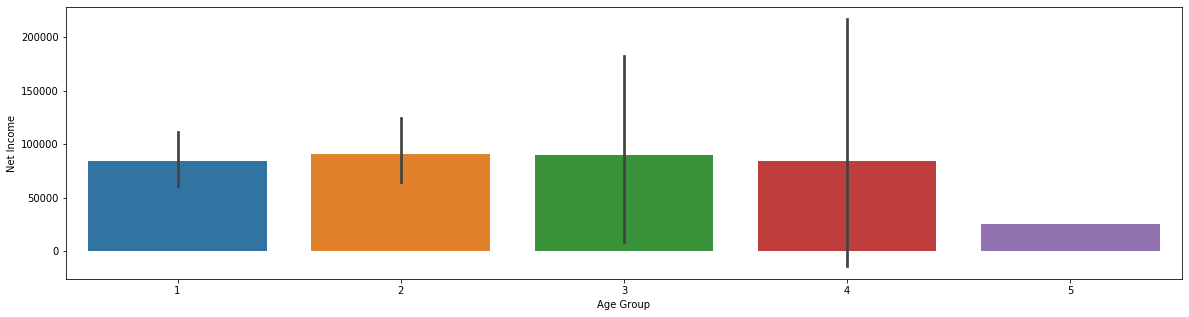

In [83]:
sns.barplot(x = 'Age Group', y = 'Net Income', data = data)

**Fig. 13**
There is a growing rate of income from 18 to 55 years. Unfortunately we noticed a huge drop for people older than 55. We can relate it to people who are retired or approaching retirement.

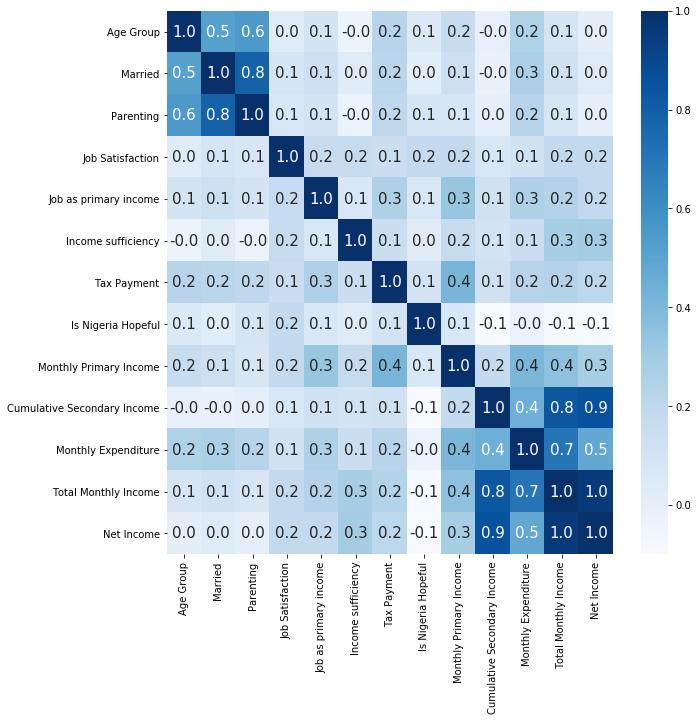

In [84]:
corr = data.corr()
corr.shape
plt.rcParams['figure.figsize']=(10,10)
sns.heatmap(corr, cbar=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')

**Fig. 14** heatmap above, we can notice the three features at the top left and the four features at the buttom right, have strong relationship among themselves.

For the rest of the plots below, recall that 0 represents No, while 1 represents Yes.

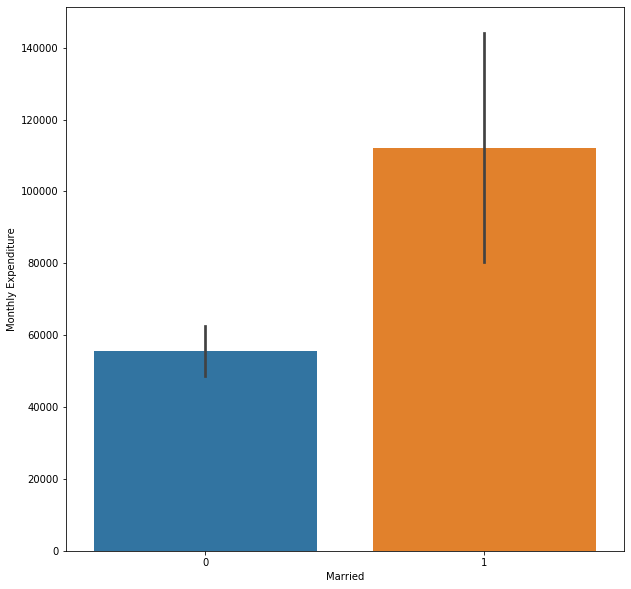

In [85]:
# Marital Status vs. Monthlu Expenditure
sns.barplot(x = 'Married', y = 'Monthly Expenditure', data = data)

**Fig. 15**

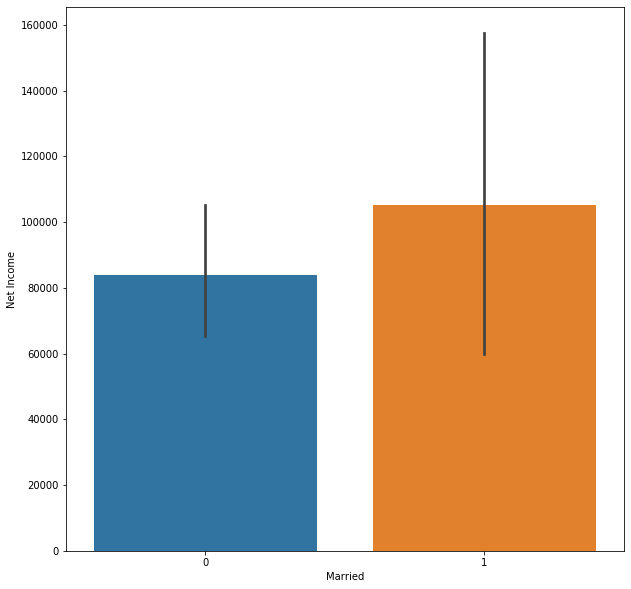

In [86]:
# Marital Status vs. Net Income
sns.barplot(x = 'Married', y = 'Net Income', data = data)

**Fig. 16**

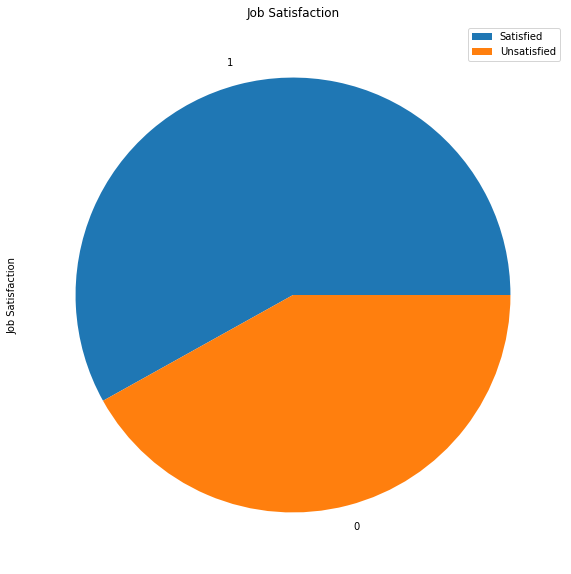

In [97]:
# Job Satisfaction
data['Job Satisfaction'].value_counts().plot(kind = 'pie')
plt.title ('Job Satisfaction')
plt.legend(['Satisfied', 'Unsatisfied'])
plt.show()

**Fig. 17**

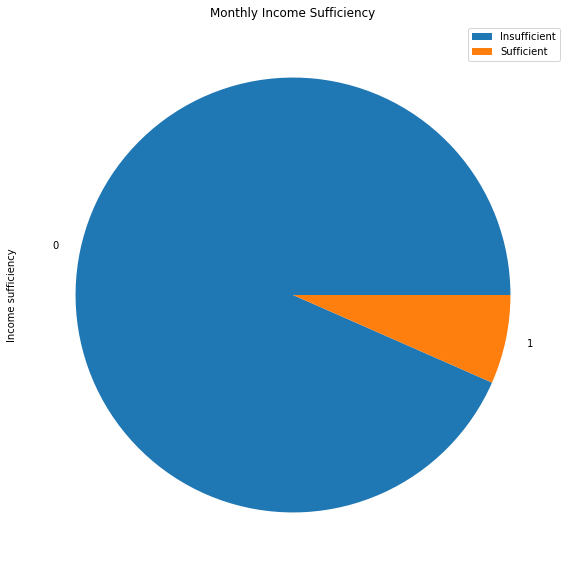

Income sufficiency: 6.600660066006601 %
Income insufficiency: 93.3993399339934 %


<Figure size 720x720 with 0 Axes>

In [111]:
# Income Sufficiency 
data['Income sufficiency'].value_counts().plot(kind = 'pie')
plt.title ('Monthly Income Sufficiency')
plt.legend(['Insufficient', 'Sufficient'])
plt.show()
plt.savefig("C:\\Users\\Sharon\\viz.png")
print('Income sufficiency:', sum(map(lambda x:x == 1, data['Income sufficiency'])) * 100/len(data['Income sufficiency']),'%')
print('Income insufficiency:', sum(map(lambda x:x == 0, data['Income sufficiency'])) * 100/len(data['Income sufficiency']),'%')

**Fig. 18**

## 5. Discussion and Conclusion<a id="8"></a>



In situating the general overview of Nigeria demographic structure and dynamics, a major thrust of discourse is on the nation's economic state. The quality and depth of wellness of the populance will be a large impact on the human development issues in the country, not just about today but tomorrow! 

It is clear from the presentations above that a lot of people earn relatively low income at the end of the month, with a smaller circle who earn higher. It was visuaized in __Fig 11__.
Investigating into the quality of living for these individuals, as shown in __Fig 18__, over 90% do not meet up to their needs with their monthly take home. This is not excluding the smaller circle we made mention of from __Fig. 11__.



If __Fig 4__, tells us that majority of people fall between the age of 18 - 45, it infers that they are the ones who are most likely to be categorized in the Low and Very low income earners as there are more people in these classes. Individuals of these age groups are known to be in their prime and therefore have a lot of dependents to take care of. If one does not have enough for himself, how much more those depending on him? The graph also revealed that older people from 55 - 65 years of age, relatively earn so low.  

Solutions can be provided to ease the financial stress of many Nigerians if the state of the nation can be properly looked deep into. First and foremost, more work should be put in our agricultural sector to make us produce our own food which will make it cheaper and affordable for every class across the country. Observing the food prices of some major foodstuffs between 2016-2019 (Table 2), it is very clear that there is an outrageous hike of food price since 2016. Our previous charts tells us that a lot people spend their lives living on debts. How well then, can they afford meals for themselves and families if food being a major necessity keeps running on a high price?
<br>Necessary infrastructures that result to the increase in cost of goods and services should be worked on so as to make production and transportation easier and faster. These are specifically in the Power and Road sectors.</br> If this can be done, food production cost and other consumables will be cheaper and a price drop can exist. Even if one may not afford clothings, one should afford feeding. 

Also, the older dependents who are as well known as retirees, should really be put into consideration when making plans for the country. According to __Fig 13__ many of them earn so low. They almost live the rest of their lives fully depending on pensions and sustainance money from their families, as well as having nothing profitable to engange in anymore. If some soft jobs could be provided for people in this category so that they can earn while they still feel part of the society rather than becoming redundant and full burdens to their younger generations.

Let's take a look again at some of our graphs before we finally draw a conculsion. 
Not minding the income, big or small, we may want to consider the expenses that come along with it. We saw there that majority of the masses have debts left before their next earning. We can scroll to the chart of __Fig 15 and 16__ and might find something similar to the __Fig 12__ visualization. They showed that married people earned higher than the single ones. Probably because  married people are mostly older than 25 which is in line with __Fig 13__ that displays a linear growth between age and income. However the major point of focus here is that __Fig 15__ showed a very wide gap for the amount earned between the two groups. After subtracting the expenses, we can see that both the married and singles are left with a similar Net Income (__Fig 16 and 12__). This could pose that older and married people have more responsibilities that come in monthly to sap out most of their "high" earnings.


Further more, the sentiment analysis made on the thoughts people had about the Nigerian government, reiterated on corruption along with many negative remarks (__Fig 7__). The citizens are definitely not hopeful and might probably begin to think of ways to help themselves without minding the governemnet. If this is so, therefore, a few suggestions will be mentioned below on how individuals can learn to sustain themsleves and not keeping their hands crossed.

First, it will be a good suggestion for Nigerians to patronise the idea of having more than one source of income, if they can. No matter the little earnings from this secondary income, it could be better than none. Younger couples should also adopt family planning and know how to organise their homes so as to live according to their incomes, to avoid a drastic fall from __Fig 15__ to __Fig 16__. Older dependents on the other hand, should be encouraged as well to get their hands on something their strengths can tolerate rather than being a complete dependent which __Fig 13__ displayed. 
<br>If the citizens and government can work together, it will definitely go a long way in the human development of the country.</br>

## __Limitations__

This research work had some limitations in getting enough data sets that covered more individuals from other States and age groups due to some constraints. It also had some data input that were unrealistic especially in the Monthly Expenditure and Cumulative Secondary Income columns which prompted using the std method. 
Knowing that no amount of technical savviness can be a substitute for little or poor information, I had to work with what I got. Not minding, the visualizations and approach used in this work can be exactly applicable to a better sourced dataset.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1 align=center><font size = 6>THANK YOU!</font></h1>
</div>